In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
all_divisions = {
    "Premier Main": 424,
    "2": 425,
    "3": 426,
    "4": 427,
    "5": 428,
    "6": 429,
    "7A": 430,
    "7B": 431,
    "8A": 432,
    "8B": 433,
    "9": 434,
    "10": 435,
    "11": 436,
    "12": 437,
    "13A": 438,
    "13B": 439,
    "14": 440,
    "15A": 441,
    "15B": 442,
    "Premier Masters": 443,
    "M2": 444,
    "M3": 445,
    "M4": 446,
    "Premier Ladies": 447,
    "L2": 448,
    "L3": 449,
    "L4": 450,
    }

In [3]:
base_directory = r"C:\Users\bpali\PycharmProjects\SquashApp\previous_seasons"

### Load Summary data

In [4]:
# Load all seasons summary data
summary_df_list = []
for season_folder in os.listdir(base_directory):
    season_folder_path = os.path.join(base_directory, season_folder)
    ranking_df_folder = os.path.join(season_folder_path, "summary_df")
    for file in os.listdir(ranking_df_folder):
        if not file.endswith("summary_df.csv"):
            continue
        file_path = os.path.join(ranking_df_folder, file)
        df = pd.read_csv(file_path)
        # Add Division column to the dataframe
        df["Division"] = file.split("_")[0]
        # Add Season column to the dataframe
        df["Season"] = season_folder
        # Add Rank column to the dataframe
        df["Rank"] = df.index + 1
        summary_df_list.append(df)

# Concatenate all the dataframes in df_list into one big dataframe
all_previous_summary_df = pd.concat(summary_df_list, ignore_index=True)

In [5]:
# Load summary_dfs for 2024-2025 season

summary_directory = r"C:\Users\bpali\PycharmProjects\SquashApp\2024-2025\summary_df"

summary_dfs = []
for division in all_divisions.keys():
    for week in range(10, 0, -1):
        try:
            summary_df = pd.read_csv(f"{summary_directory}\\week_{week}\\{division}_summary_df.csv")
            summary_df["Division"] = division
            # Create Rank column based on Points column
            summary_df["Rank"] = summary_df.index + 1
            # Add Season column to the dataframe
            summary_df["Season"] = "2024-2025"
            summary_dfs.append(summary_df)
            break
        except FileNotFoundError:
            continue

# Concatenate all the summary dataframes into one
summary_df_2024_2025 = pd.concat(summary_dfs)

In [6]:
# Concatenate the summary dataframes from all seasons
big_summary_df = pd.concat([all_previous_summary_df, summary_df_2024_2025], ignore_index=True)

# Drop rows where Played is equal to zero
big_summary_df = big_summary_df[big_summary_df["Played"] != 0]

### Load Ranking data

In [7]:
# 2024-2025 ranking_df directory
ranking_df_dir = r"C:\Users\bpali\PycharmProjects\SquashApp\2024-2025\ranking_df"

In [8]:
# In the the summary directory are week_x folders (eg week_4). First check the most recent folder (ie the highest number), then check the next highest, etc, 
# using the all_divisions dictionary to make sure we load every division's most recent summary file and avoid loading an older file for a division that has a more recent file.

ranking_dfs = []
for division in all_divisions.keys():
    for week in range(10, 0, -1):
        try:
            ranking_df = pd.read_csv(f"{ranking_df_dir}\\week_{week}\\{division}_ranking_df.csv")
            ranking_df["Season"] = "2024-2025"
            ranking_dfs.append(ranking_df)
            break
        except FileNotFoundError:
            continue

# Concatenate all the summary dataframes into one
ranking_df_2024_2025 = pd.concat(ranking_dfs)

In [9]:
# In the base directory are seasons folders (eg. 2019-2020, 2020-2021, etc.). We want to go through each season folder, go into the ranking_df folder for that season, 
# and read in all the ranking_df files (determined by whether the file ends in ranking_df) into a list of dataframes. We will then concatenate all the dataframes into one big dataframe.
# Add a Season column to the dataframe to keep track of which season the data is from.

ranking_df_list = []
for season_folder in os.listdir(base_directory):
    season_folder_path = os.path.join(base_directory, season_folder)
    ranking_df_folder = os.path.join(season_folder_path, "ranking_df")
    for file in os.listdir(ranking_df_folder):
        if not file.endswith("ranking_df.csv"):
            continue
        file_path = os.path.join(ranking_df_folder, file)
        df = pd.read_csv(file_path)
        df["Season"] = season_folder
        ranking_df_list.append(df)

# Concatenate all the dataframes in df_list into one big dataframe
big_ranking_df = pd.concat(ranking_df_list)

# Concatenate the 2024-2025 ranking_df with the big_ranking_df
final_ranking_df = pd.concat([big_ranking_df, ranking_df_2024_2025])

### Load Schedules data

In [10]:
# Load all seasons summary data
schedules_df_list = []
for season_folder in os.listdir(base_directory):
    season_folder_path = os.path.join(base_directory, season_folder)
    ranking_df_folder = os.path.join(season_folder_path, "schedules_df")
    for file in os.listdir(ranking_df_folder):
        if not file.endswith("schedules_df.csv"):
            continue
        file_path = os.path.join(ranking_df_folder, file)
        df = pd.read_csv(file_path)
        # Add Division column to the dataframe
        df["Division"] = file.split("_")[0]
        # Add Season column to the dataframe
        df["Season"] = season_folder

        schedules_df_list.append(df)

# Concatenate all the dataframes in df_list into one big dataframe
all_previous_schedules_df = pd.concat(schedules_df_list, ignore_index=True)

In [11]:
# 2024-2025 schedules_df directory
schedules_df_dir = r"C:\Users\bpali\PycharmProjects\SquashApp\2024-2025\schedules_df"

In [12]:
schedules_dfs = []
for division in all_divisions.keys():
    for week in range(10, 0, -1):
        try:
            schedules_df = pd.read_csv(f"{schedules_df_dir}\\week_{week}\\{division}_schedules_df.csv")
            schedules_df["Season"] = "2024-2025"
            schedules_df["Division"] = division
            schedules_dfs.append(schedules_df)
            break
        except FileNotFoundError:
            continue

# Concatenate all the summary dataframes into one
schedules_df_2024_2025 = pd.concat(schedules_dfs)

# Concatenate the schedules dataframes from all seasons
all_schedules_df = pd.concat([all_previous_schedules_df, schedules_df_2024_2025], ignore_index=True)

In [13]:
# Tidy Venue column
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Cornwall Street (CSPSC)", "Cornwall Street Squash Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Masters - Cornwall Street (CSPSC - M)", "Cornwall Street Squash Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Masters - Cornwall Street (M - CSPSC)", "Cornwall Street Squash Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("HK Squash Centre (HKSC)", "HK Squash Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Masters - HK Squash Centre", "HK Squash Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("HK Squash Centre (M - HKSC)", "HK Squash Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Hong Kong Football Club (HKFC)", "Hong Kong Football Club")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Hong Kong Cricket Club (HKCC)", "Hong Kong Cricket Club")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Kowloon Cricket Club (KCC)", "Kowloon Cricket Club")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("United Services Recreation Club (USRC)", "United Services Recreation Club")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Pei Ho Street (PHSSC)", "Pei Ho Street Sports Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Java Road (JRSC)", "Java Road")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Masters - Java Road (JRSC - M)", "Java Road")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Harbour Road (HRSC)", "Harbour Road Sports Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Masters - Harbour Road Sports Centre", "Harbour Road Sports Centre")
all_schedules_df["Venue"] = all_schedules_df["Venue"].str.replace("Ladies Recreation Club (LRC)", "Ladies Recreation Club")

In [14]:
all_schedules_df["Venue"].value_counts().head(20)

Venue
Cornwall Street Squash Centre             5175
HK Squash Centre                          3352
Hong Kong Football Club                   2340
Hong Kong Cricket Club                    1214
Kowloon Cricket Club                       894
Kwun Chung (KCSC)                          513
United Services Recreation Club            440
Pei Ho Street Sports Centre                430
Harbour Road Sports Centre                 246
Ladies Recreation Club                     246
Java Road                                  166
HK CLUB                                    120
Yuen Long Jockey Club (YLJCSC)             118
Royal Hong Kong Yacht Club (RHKYC)         110
Chinese University of HK (CUHK)            108
Police Sports & Recreation Club (PSRC)      89
Hong Kong Sports Institute (HKSI)           81
Yuen Long Jockey Club Squash Courts         79
HKJC Sha Tin Club House (HKJC)              77
Wai Tsuen (WTSC)                            68
Name: count, dtype: int64

In [15]:
def parse_result(result):
    """
    Function to parse the 'result' string
    """
    overall, rubbers = result.split('(')
    rubbers = rubbers.strip(')').split(',')
    return overall, rubbers

### Create Results dataframe

In [16]:
# Drop unnecessary columns
all_schedules_df.drop(columns=['vs', 'Time'], inplace=True)

# Exclude rows where 'Away Team' is '[BYE]' (indicative of a bye week)
results_df = all_schedules_df[all_schedules_df['Away Team'] != '[BYE]'].copy()

# Replace NaN values in 'Result' with an empty string before applying str.contains
results_df['Result'] = results_df['Result'].fillna('')

# Keep rows where 'Result' contains brackets (indicative of a played match)
results_df = results_df[results_df['Result'].str.contains(r'\(')]

# Apply the function to the 'Result' column
results_df[['Overall Score', 'Rubbers']] = results_df['Result'].apply(lambda x: pd.Series(parse_result(x)))

# Splitting the 'Overall Score' into two separate columns
results_df[['Home Score', 'Away Score']] = results_df['Overall Score'].str.split('-', expand=True).astype(int)

# Get counts for CR and WO
results_df['CR'] = results_df['Rubbers'].apply(lambda x: x.count('CR'))
results_df['WO'] = results_df['Rubbers'].apply(lambda x: x.count('WO'))

# Create combined CR and WO column
results_df['CR_WO'] = results_df['CR'] + results_df['WO']

#### Create Results dataframe only for 5 player matches

In [17]:
# Filter out rows where Home Score and Away Score don't sum to 5
results_df_5 = results_df[results_df['Home Score'] + results_df['Away Score'] == 5]

In [18]:
# Include only rows where Venue equals 'Cornwall Street Squash Centre', 'HK Squash Centre', 
# 'Hong Kong Football Club', 'Hong Kong Cricket Club', 'Kowloon Cricket Club', 'United Services Recreation Club'.
venues = ['Cornwall Street Squash Centre', 'HK Squash Centre', 'Hong Kong Football Club', 
          'Hong Kong Cricket Club', 'Kowloon Cricket Club', 'United Services Recreation Club']
results_df_5 = results_df_5[results_df_5['Venue'].isin(venues)]

In [19]:
# Get average Home Score by Venue
results_df_5.groupby('Venue')['Home Score'].mean().sort_values(ascending=False)

Venue
Kowloon Cricket Club               3.326957
Hong Kong Football Club            2.990107
United Services Recreation Club    2.903409
Hong Kong Cricket Club             2.838352
Cornwall Street Squash Centre      2.625420
HK Squash Centre                   2.404561
Name: Home Score, dtype: float64

In [20]:
# Get mean of Home Score by Season
results_df_5.groupby('Season')['Home Score'].mean()

Season
2016-2017    2.660000
2017-2018    2.713142
2018-2019    2.731082
2019-2020    2.701635
2021-2022    2.586160
2022-2023    2.760300
2023-2024    2.661187
2024-2025    2.600924
Name: Home Score, dtype: float64

In [21]:
# Count average instances of 'CR' and 'WO' in the 'Rubbers' column per match by Venue
results_df_5['CR'] = results_df_5['Rubbers'].apply(lambda x: x.count('CR'))
results_df_5['WO'] = results_df_5['Rubbers'].apply(lambda x: x.count('WO'))

results_df_5.groupby('Venue')[['CR', 'WO']].mean()

,CR,WO
Venue,,
Cornwall Street Squash Centre,0.265017,0.083854
HK Squash Centre,0.345861,0.127956
Hong Kong Cricket Club,0.198098,0.110935
Hong Kong Football Club,0.150685,0.050989
Kowloon Cricket Club,0.173913,0.043478
United Services Recreation Club,0.130682,0.053977


In [22]:
# Create 5 match rolling average for CR and WO by Match Week for results_df, 
results_df_5['CR Rolling Mean'] = results_df_5['CR'].transform(lambda x: x.rolling(5, 1).mean())
results_df_5['WO Rolling Mean'] = results_df_5['WO'].transform(lambda x: x.rolling(5, 1).mean())


In [23]:
results_df.head()

,Home Team,Away Team,Venue,Result,Match Week,Date,Division,Season,Overall Score,Rubbers,Home Score,Away Score,CR,WO,CR_WO
0,The Hong Kong Jockey Club,i-MASK Advance Squash Club 7,HKJC Sha Tin Club House (HKJC),"1-4(0-3,1-3,0-3,3-2,2-3)",1,03/10/2016,10,2016-2017,1-4,"[0-3, 1-3, 0-3, 3-2, 2-3]",1,4,0,0,0
1,Hong Kong Football Club 10A,Hong Kong Football Club 10B,Hong Kong Football Club,"3-2(1-3,3-0,3-1,1-3,3-0)",1,03/10/2016,10,2016-2017,3-2,"[1-3, 3-0, 3-1, 1-3, 3-0]",3,2,0,0,0
2,Royal Hong Kong Yacht Club 10,Banbil,Royal Hong Kong Yacht Club (RHKYC),"4-1(0-3,3-0,3-0,3-0,3-0)",1,03/10/2016,10,2016-2017,4-1,"[0-3, 3-0, 3-0, 3-0, 3-0]",4,1,0,0,0
3,Xavier,Perrier KCC 7,Cornwall Street Squash Centre,"3-2(3-2,3-0,3-2,0-3,2-3)",1,03/10/2016,10,2016-2017,3-2,"[3-2, 3-0, 3-2, 0-3, 2-3]",3,2,0,0,0
4,i-MASK Advance Squash Club 7,Royal Hong Kong Yacht Club 10,Cornwall Street Squash Centre,"3-2(3-0,3-0,3-1,1-3,2-3)",2,17/10/2016,10,2016-2017,3-2,"[3-0, 3-0, 3-1, 1-3, 2-3]",3,2,0,0,0


In [24]:
match_week_count = results_df.groupby('Match Week')['Home Score'].count().reset_index()

In [25]:
cr_wo_data = results_df.groupby('Match Week')[['CR', 'WO']].mean().reset_index()

In [26]:
# Merge cr_wo_data with match_week_count
cr_wo_data = cr_wo_data.merge(match_week_count, on='Match Week', how='left')
cr_wo_data

,Match Week,CR,WO,Home Score
0,1,0.111247,0.046455,818
1,2,0.142005,0.053699,838
2,3,0.179762,0.051190,840
3,4,0.167064,0.071599,838
4,5,0.200726,0.053204,827
5,6,0.202864,0.063246,838
6,7,0.207229,0.093976,830
7,8,0.217073,0.073171,820
8,9,0.328851,0.103912,818
9,10,0.291980,0.091479,798


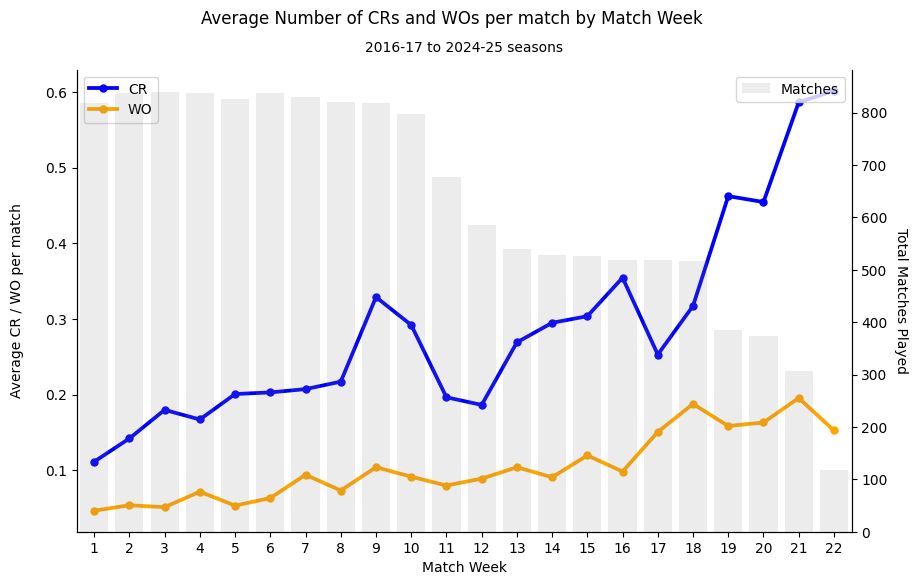

In [27]:
# Create graph to show average CR and WO per match by Match Week without confidence intervals
fig, ax = plt.subplots(figsize=(10, 6))
sns.pointplot(data=cr_wo_data, x='Match Week', y='CR', label='CR', errorbar=None, color='blue', markersize=4, alpha=1)
sns.pointplot(data=cr_wo_data, x='Match Week', y='WO', label='WO', errorbar=None, color='orange', markersize=4, alpha=1)

# Add axis to show count of matches per Match Week
ax2 = ax.twinx()
sns.barplot(data=cr_wo_data, x="Match Week", y='Home Score', label='Matches', color='grey', ax=ax2, alpha=0.15)
sns.despine(right=False)

plt.suptitle('Average Number of CRs and WOs per match by Match Week')
plt.title("2016-17 to 2024-25 seasons", size=10, y=1.02)

# Set the title of the left y-axis
ax.set_ylabel("Average CR / WO per match", rotation=90, labelpad=15)
# Set the title of the right y-axis
ax2.set_ylabel("Total Matches Played", rotation=-90, labelpad=15)
plt.xlabel('Match Week')
plt.legend()
plt.show()

In [28]:
results_df.groupby("Match Week")["CR"].mean()

Match Week
1     0.111247
2     0.142005
3     0.179762
4     0.167064
5     0.200726
6     0.202864
7     0.207229
8     0.217073
9     0.328851
10    0.291980
11    0.196455
12    0.186325
13    0.269017
14    0.294896
15    0.303605
16    0.354528
17    0.252896
18    0.317215
19    0.462338
20    0.454545
21    0.586319
22    0.601695
Name: CR, dtype: float64

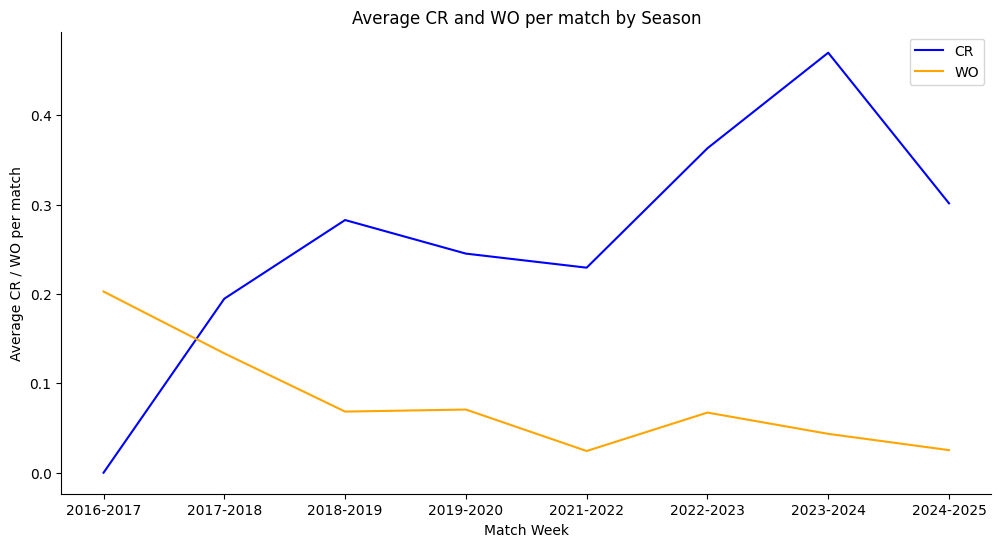

In [29]:
# Create graph to show average CR and WO per match by Season without confidence intervals
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x='Season', y='CR', label='CR', errorbar=None, color='blue')
sns.lineplot(data=results_df, x='Season', y='WO', label='WO', errorbar=None, color='orange')
sns.despine()

plt.title('Average CR and WO per match by Season')
plt.ylabel('Average CR / WO per match')
plt.xlabel('Match Week')
plt.legend()
plt.show()

In [30]:
results_df_2016 = results_df[results_df['Season'] == '2016-2017']
results_df_2017 = results_df[results_df['Season'] == '2017-2018']
results_df_2018 = results_df[results_df['Season'] == '2018-2019']
results_df_2022 = results_df[results_df['Season'] == '2022-2023']
results_df_2023 = results_df[results_df['Season'] == '2023-2024']
results_df_2024 = results_df[results_df['Season'] == '2024-2025']

# Create 5 Match Week rolling average of CR_WO for each season while avoiding SettingWithCopyWarning
results_df_2016['CR_WO Rolling Mean'] = results_df_2016['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
results_df_2017['CR_WO Rolling Mean'] = results_df_2017['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
results_df_2018['CR_WO Rolling Mean'] = results_df_2018['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
results_df_2022['CR_WO Rolling Mean'] = results_df_2022['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
results_df_2023['CR_WO Rolling Mean'] = results_df_2023['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
results_df_2024['CR_WO Rolling Mean'] = results_df_2024['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())

C:\Users\bpali\AppData\Local\Temp\ipykernel_45024\3580636522.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_2016['CR_WO Rolling Mean'] = results_df_2016['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
C:\Users\bpali\AppData\Local\Temp\ipykernel_45024\3580636522.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_2017['CR_WO Rolling Mean'] = results_df_2017['CR_WO'].transform(lambda x: x.rolling(5, 1).mean())
C:\Users\bpali\AppData\Local\Temp\ipykernel_45024\3580636522.py:11:

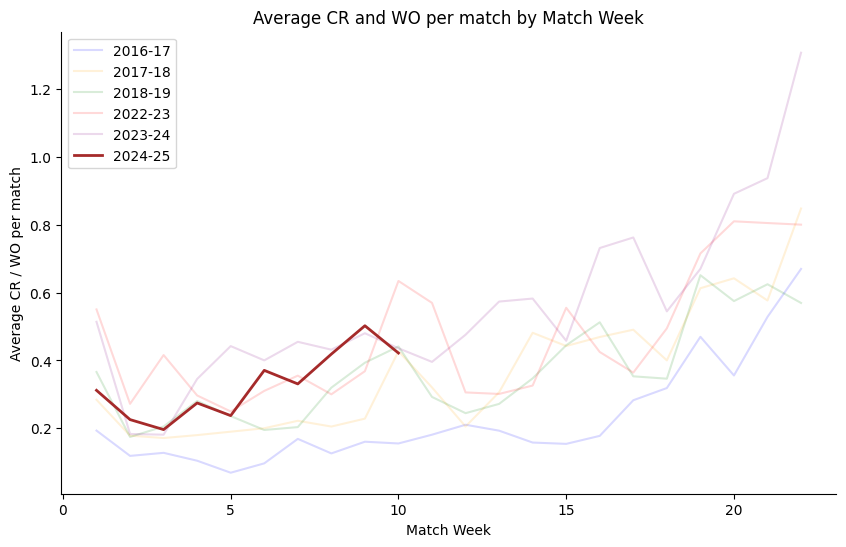

In [31]:
# Create graph to show average CR and WO per match by Match Week without confidence intervals
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=results_df_2016, x='Match Week', y='CR_WO Rolling Mean', label="2016-17", errorbar=None, color='blue', alpha=0.15)
sns.lineplot(data=results_df_2017, x='Match Week', y='CR_WO Rolling Mean', label="2017-18", errorbar=None, color='orange', alpha=0.15)
sns.lineplot(data=results_df_2018, x='Match Week', y='CR_WO Rolling Mean', label='2018-19', errorbar=None, color='green', alpha=0.15)
sns.lineplot(data=results_df_2022, x='Match Week', y='CR_WO Rolling Mean', label='2022-23', errorbar=None, color='red', alpha=0.15)
sns.lineplot(data=results_df_2023, x='Match Week', y='CR_WO Rolling Mean', label='2023-24', errorbar=None, color='purple', alpha=0.15)
# Make the 2024-25 line more prominent
sns.lineplot(data=results_df_2024, x='Match Week', y='CR_WO Rolling Mean', label='2024-25', errorbar=None, color='brown', alpha=1, linewidth=2)
sns.despine()

plt.title('Average CR and WO per match by Match Week')
plt.ylabel('Average CR / WO per match')
plt.xlabel('Match Week')
plt.show()

In [32]:
# For results_df, group by 'Season', sum "CR_WO" and divide by the number of matches played in that season
results_df.groupby('Season')['CR_WO'].sum() / results_df.groupby('Season')['Match Week'].count()

Season
2016-2017    0.202656
2017-2018    0.328165
2018-2019    0.351015
2019-2020    0.315742
2021-2022    0.253644
2022-2023    0.430187
2023-2024    0.513256
2024-2025    0.326593
dtype: float64

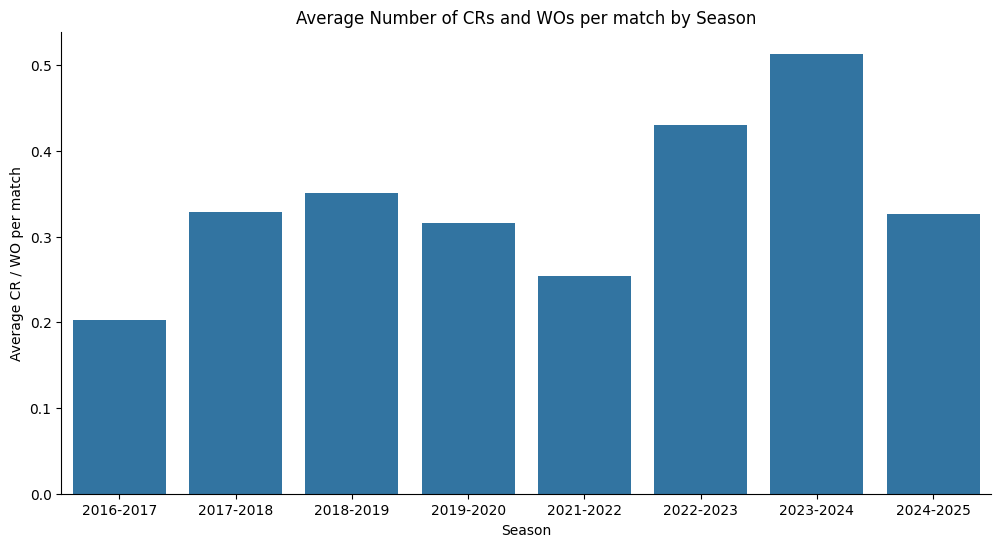

In [33]:
# Create chart of average number of CR_WO per match by Season
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Season', y='CR_WO', errorbar=None)
sns.despine()
plt.title('Average Number of CRs and WOs per match by Season')
plt.ylabel('Average CR / WO per match')
plt.xlabel('Season')
plt.show()

In [34]:
results_df.groupby('Season')['CR_WO'].sum()

Season
2016-2017    473
2017-2018    762
2018-2019    847
2019-2020    353
2021-2022    261
2022-2023    761
2023-2024    968
2024-2025    323
Name: CR_WO, dtype: int64

In [35]:
# Show number of CR_WO by Division for results_df_2023
results_df_2023.groupby('Division')['CR_WO'].sum().sort_values(ascending=False)

Division
18     180
19     115
17A    113
16      78
7       62
12B     61
17B     60
13      53
12A     37
5       36
11      22
3       21
M3      18
2       17
4       15
L2      15
L3      14
L1      13
15      12
10       8
14       7
8        6
1        4
M2       1
M1       0
Name: CR_WO, dtype: int64

In [36]:
results_df_2023.groupby('Division')['CR_WO'].mean().sort_values(ascending=False)

Division
18     1.363636
17A    1.345238
12B    0.968254
17B    0.952381
19     0.871212
13     0.736111
16     0.590909
3      0.525000
5      0.500000
7      0.469697
12A    0.440476
L1     0.433333
2      0.425000
11     0.349206
L2     0.250000
M3     0.250000
4      0.250000
L3     0.222222
1      0.200000
10     0.111111
15     0.090909
8      0.083333
14     0.083333
M2     0.013889
M1     0.000000
Name: CR_WO, dtype: float64

In [37]:
# Count total number of matches per Season
results_df.groupby('Season')['Home Score'].count()

Season
2016-2017    2334
2017-2018    2322
2018-2019    2413
2019-2020    1118
2021-2022    1029
2022-2023    1769
2023-2024    1886
2024-2025     989
Name: Home Score, dtype: int64

### Total number of unique registered players by season

In [38]:
# Get total number of players in each season
total_players = final_ranking_df.groupby("Season")["Name of Player"].nunique()
total_players

Season
2016-2017    1890
2017-2018    1946
2018-2019    1900
2019-2020    1925
2021-2022    1592
2022-2023    1519
2023-2024    1657
2024-2025    1709
Name: Name of Player, dtype: int64

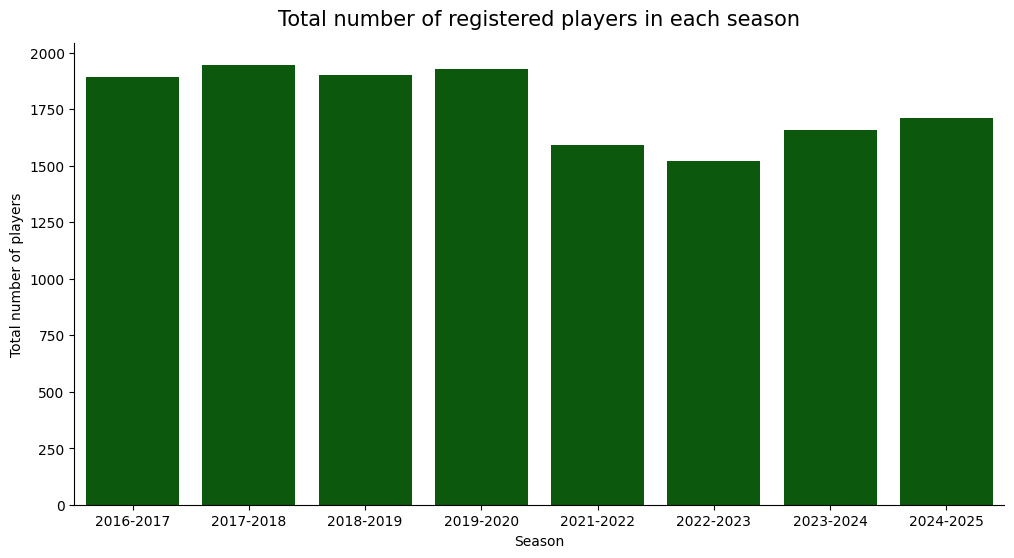

In [39]:
# Create plot to show total number of players in each season
plt.figure(figsize=(12, 6))
sns.barplot(x=total_players.index, y=total_players.values, color='darkgreen')
plt.title('Total number of registered players in each season', y=1.02, size=15)
plt.ylabel('Total number of players')
plt.xlabel('Season')
sns.despine()
plt.show()

### Total number of unique players in each season to have played 5+ games

In [40]:
# Get total number of players in each season who have played at least 5 matches
total_players_5 = final_ranking_df[final_ranking_df["Games Played"] >= 5].groupby("Season")["Name of Player"].nunique()
total_players_5

Season
2016-2017    1597
2017-2018    1593
2018-2019    1584
2019-2020    1080
2021-2022     980
2022-2023    1252
2023-2024    1336
2024-2025     897
Name: Name of Player, dtype: int64

### Show which divisions players played in over the seasons

In [41]:
# Filter big_df to only include players who have played 1+ games
final_ranking_df_filtered = final_ranking_df[final_ranking_df["Games Played"] >= 1]

# Strip "*" and "^ " from Name of Player
final_ranking_df_filtered["Name of Player"] = final_ranking_df_filtered["Name of Player"].str.strip("*")
final_ranking_df_filtered["Name of Player"] = final_ranking_df_filtered["Name of Player"].str.strip("^ ")

C:\Users\bpali\AppData\Local\Temp\ipykernel_45024\1539099606.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_ranking_df_filtered["Name of Player"] = final_ranking_df_filtered["Name of Player"].str.strip("*")
C:\Users\bpali\AppData\Local\Temp\ipykernel_45024\1539099606.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_ranking_df_filtered["Name of Player"] = final_ranking_df_filtered["Name of Player"].str.strip("^ ")


In [42]:
# Drop rows where Division is NaN
final_ranking_df_filtered = final_ranking_df_filtered.dropna(subset=["Division"]).copy()
# Filter out rows where Division contains "M" or "L"
final_ranking_df_filtered = final_ranking_df_filtered[~final_ranking_df_filtered["Division"].str.contains("M|L", na=False)]
# Aggregate the data to ensure no duplicate entries
final_ranking_df_filtered_unique = final_ranking_df_filtered.groupby(["Name of Player", "Season"])["Division"].first().reset_index()
# Create a new dataframe where the seasons are the columns, the rows are the players, and the values are the division the player was in that season
player_divisions = final_ranking_df_filtered_unique.pivot(index="Name of Player", columns="Season", values="Division")

In [43]:
player_divisions

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025
Name of Player,,,,,,,,
Abel Jon,16A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abel Jonathan,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN
Achouch Frank,NaN,4,4,4,8,8,8,6
Achouch Jules Simon,NaN,NaN,NaN,NaN,19A,12B,12A,6
Adams David,10,11,11A,13A,13B,13,11,10
...,...,...,...,...,...,...,...,...
Zimmermann Michael,8B,8,6,6,NaN,NaN,NaN,NaN
Zirah Pierre-Alexis Joachim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13A
Zou Kevin Tianyi,NaN,NaN,NaN,19A,NaN,NaN,NaN,NaN


In [44]:
# Add a column to player_divisions that contains the number of seasons each player has played in, then sort by that column
player_divisions["Seasons Played"] = player_divisions.count(axis=1)
player_divisions_sorted = player_divisions.sort_values(by="Seasons Played", ascending=False)

In [45]:
player_divisions_sorted[player_divisions_sorted["Seasons Played"] == 8].sort_values(by="Name of Player")

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025,Seasons Played
Name of Player,,,,,,,,,
Adams David,10,11,11A,13A,13B,13,11,10,8
Adjemian Nicolas,13,10,13A,13A,10,10,10,6,8
Au Alex Ka Man,6,7B,7,9,8,10,10,7A,8
Au Ling Yu,18B,12A,10,5,4,3,3,3,8
Au Shuk Ting,17A,14,14,13A,13A,16,14,7B,8
...,...,...,...,...,...,...,...,...,...
Yiu Sai Ngoi,9,11,11A,12B,12A,12A,12A,8B,8
Young Ki Chun,15,14,13B,13A,15A,12A,13,8A,8
Yu Vincent Hok Yan,2,2,2,2,2,2,2,2,8


In [46]:
player_divisions_sorted[player_divisions_sorted.index.str.contains("himmy", case=False)]

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025,Seasons Played
Name of Player,,,,,,,,,
Yeung Himmy Cheuk Him,NaN,10,7,7,7,7,7,5,7


#### Percentage of Players who played at least 5 games

In [47]:
# Calculate the percentage of players in each season who have played at least 5 matches
total_players_5 / total_players * 100

Season
2016-2017    84.497354
2017-2018    81.860226
2018-2019    83.368421
2019-2020    56.103896
2021-2022    61.557789
2022-2023    82.422646
2023-2024    80.627640
2024-2025    52.486834
Name: Name of Player, dtype: float64

#### Percentage of Players who played at least 1 game

In [48]:
# Calculate the percentage of players in each season who have played at least 1 match
total_players_1 = final_ranking_df[final_ranking_df["Games Played"] >= 1].groupby("Season")["Name of Player"].nunique()
total_players_1 / total_players * 100

Season
2016-2017    96.613757
2017-2018    95.477903
2018-2019    95.736842
2019-2020    92.467532
2021-2022    91.331658
2022-2023    96.247531
2023-2024    95.473748
2024-2025    93.973084
Name: Name of Player, dtype: float64

### HKCC Summary Analysis

In [49]:
big_summary_df[big_summary_df['Played'] == 0]

,Team,Played,Won,Lost,Points,Division,Season,Rank,Rubbers For,Rubbers Against


In [50]:
# Filter big_summary_df for Team column that contains "HKCC" or "Hong Kong Cricket Club"
hkcc_summary = big_summary_df[big_summary_df["Team"].str.contains("HKCC", case=False) |
                              big_summary_df["Team"].str.contains("Hong Kong Cricket Club", case=False)]

#### League Winners

In [51]:
hkcc_summary[hkcc_summary["Rank"] == 1]

,Team,Played,Won,Lost,Points,Division,Season,Rank,Rubbers For,Rubbers Against
73,HKCC Wednesday Night Rockers,20,18,2,98,16B,2016-2017,1,NaN,NaN
207,Hong Kong Cricket Club L2B,18,15,3,72,L2,2016-2017,1,NaN,NaN
214,Hong Kong Cricket Club L3,12,9,3,46,L3,2016-2017,1,NaN,NaN
387,Hong Kong Cricket Club 1,18,13,5,68,3,2017-2018,1,NaN,NaN
461,Hong Kong Cricket Club L2,15,13,2,59,L2,2017-2018,1,NaN,NaN
475,Hong Kong Cricket Club M1,16,13,3,65,M1,2017-2018,1,NaN,NaN
523,Hong Kong Cricket Club 6,21,20,1,102,11B,2018-2019,1,NaN,NaN
610,Hong Kong Cricket Club 8,22,19,3,103,18,2018-2019,1,NaN,NaN
719,Hong Kong Cricket Club M1A,20,14,6,65,M1,2018-2019,1,NaN,NaN
748,Hong Kong Cricket Club 10,9,9,0,40,10,2019-2020,1,NaN,NaN


In [52]:
# Show count of Rank equals 1 by Season
hkcc_summary[hkcc_summary["Rank"] == 1].groupby("Season")["Rank"].count()

Season
2016-2017    3
2017-2018    3
2018-2019    3
2019-2020    4
2021-2022    1
2022-2023    1
2023-2024    1
Name: Rank, dtype: int64

In [53]:
# Get overall win percentage record for hkcc_summary, summing all rows in Won column and dividing by sum of all rows in Played column
win_percentage = hkcc_summary["Won"].sum() / hkcc_summary["Played"].sum()
win_percentage


0.5302013422818792

In [54]:
# Show Win Percentage by Season buy avoid SettingWithCopyWarning
hkcc_summary = hkcc_summary.copy()
hkcc_summary["Win Percentage"] = hkcc_summary["Won"] / hkcc_summary["Played"]
hkcc_summary.groupby("Season")["Win Percentage"].mean()

Season
2016-2017    0.517713
2017-2018    0.578402
2018-2019    0.605505
2019-2020    0.592215
2021-2022    0.483460
2022-2023    0.504749
2023-2024    0.427531
2024-2025    0.428758
Name: Win Percentage, dtype: float64

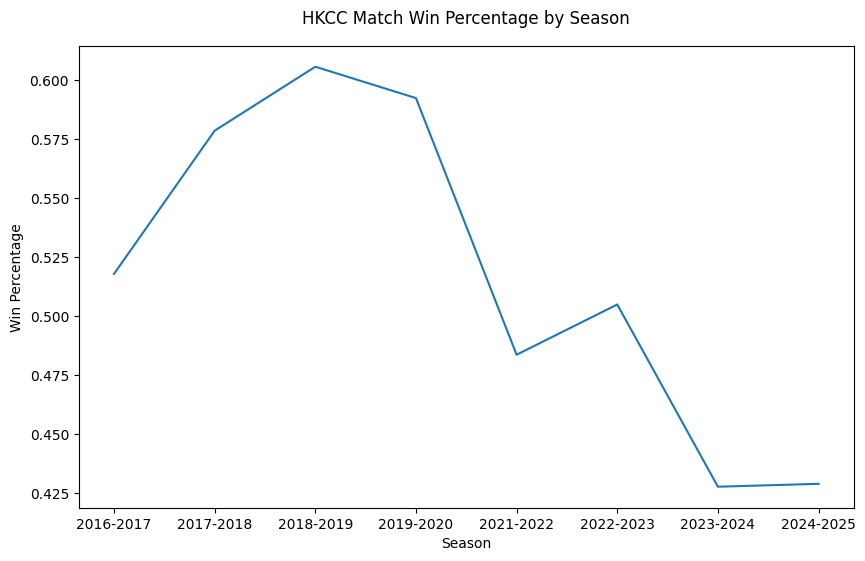

In [55]:
# Draw a line plot of the Win Percentage by Season
plt.figure(figsize=(10, 6))
# Draw a line plot of the Win Percentage by Season without confidence interval
sns.lineplot(data=hkcc_summary, x="Season", y="Win Percentage", errorbar=None)
# Set the title of the plot
plt.title("HKCC Match Win Percentage by Season", y=1.03)
# Remove gridlines
plt.grid(False)

### KCC Win Percentage by Season

In [56]:
# Filter big_summary_df for Team column that contains "KCC" or "Kowloon Cricket Club", but not "HKCC"
kcc_summary = big_summary_df[big_summary_df["Team"].str.contains(r"\b(?:Kowloon Cricket Club|KCC)\b", flags=re.IGNORECASE)]

In [57]:
# Get overall win percentage record for hkcc_summary, summing all rows in Won column and dividing by sum of all rows in Played column
win_percentage = kcc_summary["Won"].sum() / kcc_summary["Played"].sum()
win_percentage

0.6756225425950196

In [58]:
# Show Win Percentage by Season buy avoid SettingWithCopyWarning
kcc_summary = kcc_summary.copy()
kcc_summary["Win Percentage"] = kcc_summary["Won"] / kcc_summary["Played"]
kcc_summary.groupby("Season")["Win Percentage"].mean()

Season
2016-2017    0.625702
2017-2018    0.641083
2018-2019    0.704762
2019-2020    0.681812
2021-2022    0.709041
2022-2023    0.624034
2023-2024    0.683452
2024-2025    0.684444
Name: Win Percentage, dtype: float64

### HKFC Win Percentage by Season

In [59]:
# Filter big_summary_df for Team column that contains "HKFC" or "Hong Kong Football Club"
hkfc_summary = big_summary_df[big_summary_df["Team"].str.contains("HKFC", case=False) |
                              big_summary_df["Team"].str.contains("Hong Kong Football Club", case=False)]

In [60]:
# Get overall win percentage record for hkcc_summary, summing all rows in Won column and dividing by sum of all rows in Played column
hkfc_win_percentage = hkfc_summary["Won"].sum() / hkfc_summary["Played"].sum()
hkfc_win_percentage

0.5541795665634675

In [61]:
# Show Win Percentage by Season buy avoid SettingWithCopyWarning
hkfc_summary = hkfc_summary.copy()
hkfc_summary["Win Percentage"] = hkfc_summary["Won"] / hkfc_summary["Played"]
hkfc_summary.groupby("Season")["Win Percentage"].mean()

Season
2016-2017    0.554078
2017-2018    0.540525
2018-2019    0.548704
2019-2020    0.584957
2021-2022    0.509099
2022-2023    0.530581
2023-2024    0.589479
2024-2025    0.549896
Name: Win Percentage, dtype: float64

#### USRC Win Percentage by Season

In [62]:
usrc_summary = big_summary_df[big_summary_df["Team"].str.contains("united services", case=False) |
               big_summary_df["Team"].str.contains("usrc", case=False)]

In [63]:
# Get overall win percentage record for usrc_summary, summing all rows in Won column and dividing by sum of all rows in Played column
usrc_win_percentage = usrc_summary["Won"].sum() / usrc_summary["Played"].sum()
usrc_win_percentage

0.5702479338842975

In [64]:
# Show Win Percentage by Season but avoid SettingWithCopyWarning
usrc_summary = usrc_summary.copy()
usrc_summary["Win Percentage"] = usrc_summary["Won"] / usrc_summary["Played"]
usrc_summary.groupby("Season")["Win Percentage"].mean()

Season
2016-2017    0.474890
2017-2018    0.636508
2018-2019    0.649747
2019-2020    0.714646
2021-2022    0.355219
2022-2023    0.518519
2023-2024    0.541667
2024-2025    0.654630
Name: Win Percentage, dtype: float64

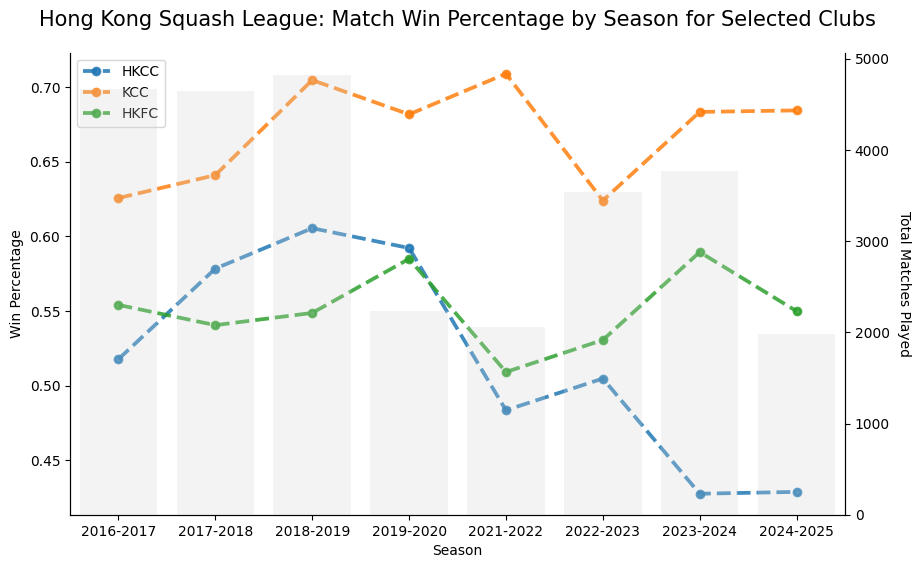

In [65]:
# Add another axis to show total number of matches played in each season
fig, ax = plt.subplots(figsize=(10, 6))
# Draw a line plot of the Win Percentage by Season for HKCC with dotted line
sns.pointplot(data=hkcc_summary, x="Season", y="Win Percentage", label="HKCC", errorbar=None, linestyle="--", alpha=0.85, markersize=5)
# Draw a line plot of the Win Percentage by Season for KCC
sns.pointplot(data=kcc_summary, x="Season", y="Win Percentage", label="KCC", errorbar=None, linestyle="--", alpha=0.85, markersize=5)
# Draw a line plot of the Win Percentage by Season for HKFC
sns.pointplot(data=hkfc_summary, x="Season", y="Win Percentage", label="HKFC", errorbar=None, linestyle="--", alpha=0.85, markersize=5)
# Set the title of the plot
plt.title("Hong Kong Squash League: Match Win Percentage by Season for Selected Clubs", y=1.04, size=15)
# Remove gridlines
plt.grid(False)
# Add a legend to the plot
plt.legend()
# Create another y-axis on the right side of the plot
ax2 = ax.twinx()
# Draw a bar plot of the total number of matches played in each season
sns.barplot(data=big_summary_df, x="Season", y="Played", ax=ax2, color="lightgray", alpha=0.25, errorbar=None, estimator=sum)
# Set the title of the right y-axis
ax2.set_ylabel("Total Matches Played", rotation=-90, labelpad=15)
# Remove gridlines from the right y-axis
ax2.grid(False)
# remove top spine only
sns.despine(top=True, right=False)


In [66]:
big_summary_df.sort_values(by="Team").to_csv("big_summary_df.csv", index=False)

### Calculate Competitiveness of Divisions

In [67]:
def gini_coefficient(x):
    """
    Calculate the Gini coefficient of a numpy array.
    """
    # Ensure the array is 1D and sorted
    x = np.sort(np.array(x, dtype=np.float64).flatten())
    
    # Handle negative values and zeros
    if np.amin(x) < 0:
        x -= np.amin(x)
    x += 1e-9  # Prevent division by zero
    
    n = x.size
    index = np.arange(1, n + 1)
    gini = (2 * np.sum(index * x) - (n + 1) * np.sum(x)) / (n * np.sum(x))
    
    return gini

In [68]:
# Fix this to include 2024-2025 season

In [69]:
gini_results = []

for df in summary_df_list:
    # Extract division and season information
    division = df['Division'].iloc[0]
    season = df['Season'].iloc[0]
    
    # Extract points and handle missing or non-numeric values
    points = df['Points'].replace([np.inf, -np.inf], np.nan).dropna().astype(float).values
    
    # Skip if points array is empty
    if points.size == 0:
        continue
    
    # Calculate the Gini coefficient
    gini = gini_coefficient(points)
    
    # Store the results
    gini_results.append({'Division': division, 'Season': season, 'Gini_Coefficient': gini})


In [70]:
gini_df = pd.DataFrame(gini_results)

In [71]:
gini_df.groupby("Season")["Gini_Coefficient"].mean()

Season
2016-2017    0.240137
2017-2018    0.253069
2018-2019    0.224662
2019-2020    0.231791
2021-2022    0.232191
2022-2023    0.208233
2023-2024    0.222884
Name: Gini_Coefficient, dtype: float64

In [72]:
# Create a new column for gini_df called "League Type". If "M" is found in Division, League Type is "Masters", 
# If "L" is found in Division, League Type is "Ladies". Otherwise, league type is "Main"
gini_df["League Type"] = np.where(gini_df["Division"].str.contains("M", case=False), "Masters",
                                    np.where(gini_df["Division"].str.contains("L", case=False), "Ladies", "Main"))



In [83]:
gini_df.sort_values(by="Gini_Coefficient", ascending=True).head(10)

,Division,Season,Gini_Coefficient,League Type
14,1,2016-2017,0.055652,Main
161,1,2022-2023,0.075472,Main
188,3,2023-2024,0.097890,Main
90,M3,2018-2019,0.108663,Masters
162,2,2022-2023,0.118333,Main
88,M1,2018-2019,0.119369,Masters
109,4,2019-2020,0.126157,Main
60,M3,2017-2018,0.130763,Masters
125,13A,2021-2022,0.138021,Main
27,L3,2016-2017,0.140152,Ladies


In [74]:
# See average Gini Coefficient by League Type
gini_df.groupby("League Type")["Gini_Coefficient"].mean()

League Type
Ladies     0.239536
Main       0.233012
Masters    0.211647
Name: Gini_Coefficient, dtype: float64

### HKCC Total Games Played

In [75]:
# Filter final_ranking_df for Team column that contains "HKCC" or "Hong Kong Cricket Club"
hkcc_ranking = final_ranking_df[final_ranking_df["Team"].str.contains("HKCC", case=False) |
                              final_ranking_df["Team"].str.contains("Hong Kong Cricket Club", case=False)]

# Strip "^ " from anyone in Name of Player column while avoiding SettingWithCopyWarning
hkcc_ranking = hkcc_ranking.copy()
hkcc_ranking["Name of Player"] = hkcc_ranking["Name of Player"].str.strip("^ ")

# Group by Name of Player and aggregate Average Points (by mean), Total Game Points (by sum), and Games Played (by sum)
hkcc_ranking_grouped = hkcc_ranking.groupby("Name of Player").agg({"Average Points": "mean",
                                                                  "Total Game Points": "sum",
                                                                  "Games Played": "sum",
                                                                  "Won": "sum",
                                                                  "Lost": "sum",
                                                                  }).reset_index()

# Sort by Games Played
hkcc_ranking_grouped = hkcc_ranking_grouped.sort_values(by="Games Played", ascending=False)

# Create Win Percentage column
hkcc_ranking_grouped["Win Percentage"] = hkcc_ranking_grouped["Won"] / hkcc_ranking_grouped["Games Played"]

#### Create dataframe to show games played by season

In [76]:
# Show number of Games Played in each Season for each player, with each Season being a separate column
hkcc_ranking_pivot = hkcc_ranking.pivot_table(index="Name of Player", columns="Season", values="Games Played", aggfunc="sum", fill_value=0)

# Add total column to hkcc_ranking_pivot
hkcc_ranking_pivot["Total"] = hkcc_ranking_pivot.sum(axis=1)

# Sort by Total
hkcc_ranking_pivot = hkcc_ranking_pivot.sort_values(by="Total", ascending=False)

# Save hkcc_ranking_pivot to a csv file
hkcc_ranking_pivot.to_csv("hkcc_ranking_pivot.csv")

In [77]:
hkcc_ranking_grouped[["Name of Player", "Games Played"]].head(25)

,Name of Player,Games Played
337,Wong Jessica Po Sze,211
355,Zimmermann Lorenz,122
15,Bernard Edwin,106
319,Vera Henry,106
41,Chan Peter Sun Hong,106
22,Bradbury Adrian,102
339,Wong Kirstie Po Yui,100
295,Swarbrick Andrew,99
280,Skinn Christopher Andrew,98
49,Chang Sean Pey,97


In [78]:
hkcc_ranking_pivot[hkcc_ranking_pivot.index.str.contains("Neal", case=False)]

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025,Total
Name of Player,,,,,,,,,
Soo Neal,0,0,0,9,11,15,3,0,38


In [79]:
hkcc_ranking_pivot.head(10)

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025,Total
Name of Player,,,,,,,,,
Wong Jessica Po Sze,32,19,29,18,20,35,45,13,211
Zimmermann Lorenz,18,14,22,13,15,24,15,1,122
Bernard Edwin,5,13,24,16,8,10,22,8,106
Vera Henry,20,17,14,5,2,18,20,10,106
Chan Peter Sun Hong,22,25,24,15,20,0,0,0,106
Bradbury Adrian,7,9,9,10,17,19,24,7,102
Wong Kirstie Po Yui,0,0,25,11,16,23,19,6,100
Swarbrick Andrew,17,24,24,17,0,17,0,0,99
Skinn Christopher Andrew,0,0,20,11,20,25,14,8,98


In [80]:
# Filter hkcc_ranking_pivot for players who have played at least 80 matches and have played in the 2024-2025 season and then show only index and "Total"
hkcc_ranking_pivot[(hkcc_ranking_pivot["Total"].between(80, 100)) & (hkcc_ranking_pivot["2024-2025"] > 0)]

Season,2016-2017,2017-2018,2018-2019,2019-2020,2021-2022,2022-2023,2023-2024,2024-2025,Total
Name of Player,,,,,,,,,
Wong Kirstie Po Yui,0,0,25,11,16,23,19,6,100
Skinn Christopher Andrew,0,0,20,11,20,25,14,8,98
Openshaw Michael,14,8,14,9,15,22,14,1,97
Denham Paul,0,0,0,8,16,32,32,8,96
Chiu Ho Fai,0,0,0,6,9,35,32,14,96
Bruwer Frank,0,0,28,12,10,26,10,9,95
Achouch Frank,15,6,14,5,8,18,19,10,95
Lamb Russell,0,0,24,15,13,8,22,10,92
Kwok Alvina,0,0,17,7,9,15,33,9,90


In [81]:
# Filter final_ranking_df for Team column that contains "HKCC" or "Hong Kong Cricket Club"
hkfc_ranking = final_ranking_df[final_ranking_df["Team"].str.contains("HKFC", case=False) |
                              final_ranking_df["Team"].str.contains("Hong Kong Football Club", case=False)]

# Strip "^ " from anyone in Name of Player column while avoiding SettingWithCopyWarning
hkfc_ranking = hkfc_ranking.copy()
hkfc_ranking["Name of Player"] = hkfc_ranking["Name of Player"].str.strip("^ ")

# Group by Name of Player and aggregate Average Points (by mean), Total Game Points (by sum), and Games Played (by sum)
hkfc_ranking_grouped = hkfc_ranking.groupby("Name of Player").agg({"Average Points": "mean",
                                                                  "Total Game Points": "sum",
                                                                  "Games Played": "sum",
                                                                  "Won": "sum",
                                                                  "Lost": "sum",
                                                                  }).reset_index()

# Sort by Games Played
hkfc_ranking_grouped = hkfc_ranking_grouped.sort_values(by="Games Played", ascending=False)

# Create Win Percentage column
hkfc_ranking_grouped["Win Percentage"] = hkfc_ranking_grouped["Won"] / hkfc_ranking_grouped["Games Played"]

In [82]:
hkfc_ranking_grouped[hkfc_ranking_grouped["Games Played"] >= 100]

,Name of Player,Average Points,Total Game Points,Games Played,Won,Lost,Win Percentage
310,Murray David,12.671875,2244,174,79,95,0.454023
126,Gates Stuart,13.901667,2793,167,102,65,0.610778
457,Ward Andrew,16.681429,2850,165,115,50,0.696970
493,Yeung Yurisa,15.900000,2841,159,118,41,0.742138
408,Sung Iris,9.209474,1572,157,42,115,0.267516
307,Mulchand Rajesh,16.581333,2592,150,103,47,0.686667
425,Tanner Julian,16.236667,2679,147,86,61,0.585034
148,Ho Eric Chu Him,15.694118,2232,141,82,59,0.581560
231,Lee Ka Man Carmen,14.355625,1998,137,92,45,0.671533
488,Wu Renee,15.031250,2220,130,92,38,0.707692
